<a href="https://colab.research.google.com/github/DeepikaNS-commits/NityaDS_INFO5731-Spring2025/blob/main/INFO5731_Assignment_5_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 5**

---


**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100

**Full Points will be given those who present well**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

# **SENTIMENT ANALYSIS**

The objective of this assignment is to give you **hands-on experience** in applying various** sentiment analysis techniques** on real-world textual data. You are expected to explore data, apply machine learning models, and evaluate their performance

**1. Dataset Collection & Preparation**

Find a real-world dataset with text and positive, negative, and neutral sentiment labels.

Justify your dataset choice and handle **class imbalance** if needed.

**2. Exploratory Data Analysis (EDA)**

Clean and preprocess the data (tokenization, stopwords, lemmatization).

Perform EDA: class distribution, word clouds, n-gram analysis, sentence lengths, etc.

Visualize insights using relevant plots and charts.

**3. Sentiment Classification**

Apply at least three traditional ML models (e.g., SVM, Naive Bayes, XGBoost) using TF-IDF or embeddings.

If applicable, compare with a pretrained model (RoBERTa/BERT).

Tune hyperparameters and use cross-validation.

**4. Evaluation & Reporting**

Evaluate with metrics: Accuracy, Precision, Recall, F1, Confusion Matrix.

Summarize results, compare models, and reflect on what worked.

Reason for selecting the dataset(s)

Here are some of the reasons why the Financial News Sentiment Analysis dataset is a good fit for this assignment:

Real-World Source:

The dataset includes real short statements and headlines from financial news, making this a more realistic domain-specific textual dataset.

Sentiment Labels Included:

The sentiment label for each news snippet has previously been assigned one of three sentiment classes:

positive

neutral

negative

Perfectly suits the need of categorizing text into three sentiments.

Textual Variety:

The sentences span many different financial contexts — earnings, investments, economic outlooks — making it well-suited to help understand sentiment in the context of business and economics.

Manageable Size:

The dataset has about 5,847 rows, which is large enough for training models, but small enough for rapid experimentation in academia, or prototype settings.

Structured & Clean Format:

The CSV file has two columns:

sentiment

text

No need for additional cleanup of formatting or labels of columns.

In [6]:
import pandas as pd

# Load the CSV
df = pd.read_csv("all-data.csv", encoding="latin-1", header=None)
df.columns = ["sentiment", "text"]

# Preview
df.head()


,sentiment,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [7]:
df['sentiment'].value_counts()


,count
sentiment,
neutral,2879
positive,1363
negative,604


In [23]:
balanced_df = (
    df.groupby('sentiment')
      .apply(lambda x: x.sample(n=604, random_state=42), include_groups=False)
      .reset_index(drop=True)
)

# Now, manually add the sentiment column from the group
# since include_groups=False removes it
balanced_df['sentiment'] = (
    df.groupby('sentiment').apply(lambda x: [x.name] * 604, include_groups=False).explode().reset_index(drop=True)
)


In [24]:
balanced_df['sentiment'].value_counts()


,count
sentiment,
negative,604
neutral,604
positive,604


In [39]:
# Delete existing nltk data folder
!rm -rf /root/nltk_data

import nltk
nltk.data.path.append('/root/nltk_data')

# Force re-download of stopwords
nltk.download('stopwords', download_dir='/root/nltk_data')
nltk.download('wordnet', download_dir='/root/nltk_data')
nltk.download('omw-1.4', download_dir='/root/nltk_data')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [43]:
import re
import string

# Custom stopwords fallback list
stop_words = set("""
i me my myself we our ours ourselves you your yours yourself yourselves he him his himself she her hers herself it its itself
they them their theirs themselves what which who whom this that these those am is are was were be been being have has had
having do does did doing a an the and but if or because as until while of at by for with about against between into through
during before after above below to from up down in out on off over under again further then once here there when where why
how all any both each few more most other some such no nor not only own same so than too very s t can will just don should now
""".split())

# Preprocessing without lemmatization
def preprocess(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = re.findall(r'\b[a-z]{2,}\b', text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Apply to your DataFrame
balanced_df['clean_text'] = balanced_df['text'].apply(preprocess)


In [44]:
balanced_df[['sentiment', 'clean_text']].head()


,sentiment,clean_text
0,negative,company decided end temporarily shut ammonia p...
1,negative,eur august finnish media group ilkkayhtyma oyj...
2,negative,steelmaker said drop profit explained continui...
3,negative,finlandbased stockmann group closed seven fran...
4,negative,operating loss nonrecurring items eur mn compa...


<ipython-input-45-94982489a78b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=balanced_df, x='sentiment', palette='Set2')


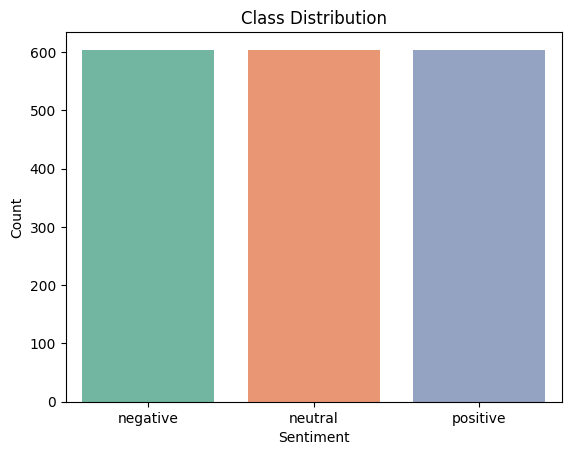

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=balanced_df, x='sentiment', palette='Set2')
plt.title("Class Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


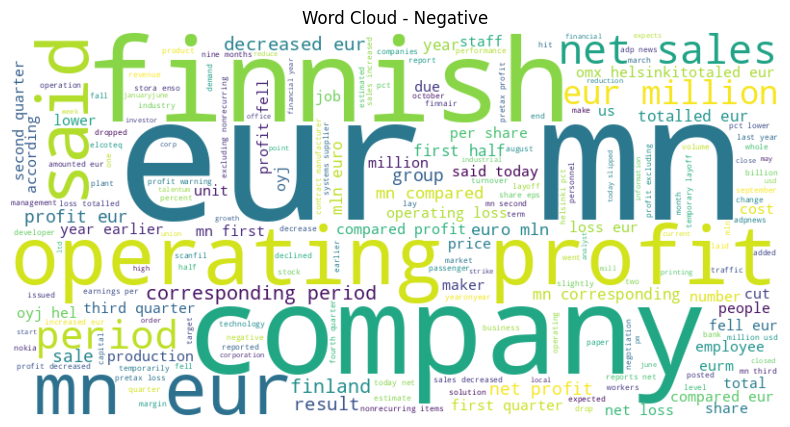

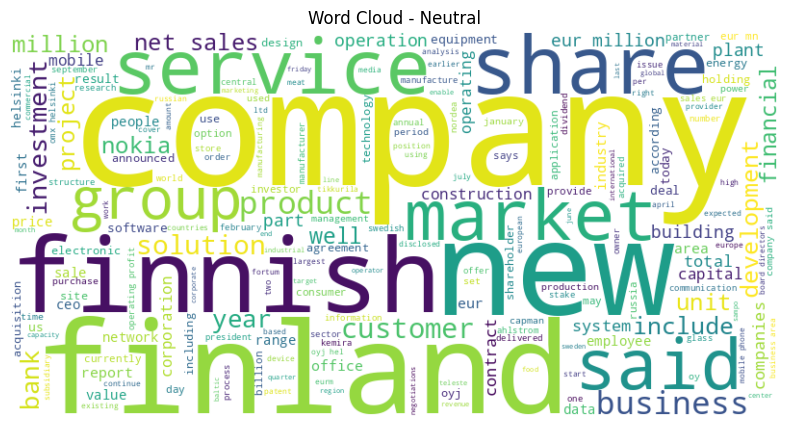

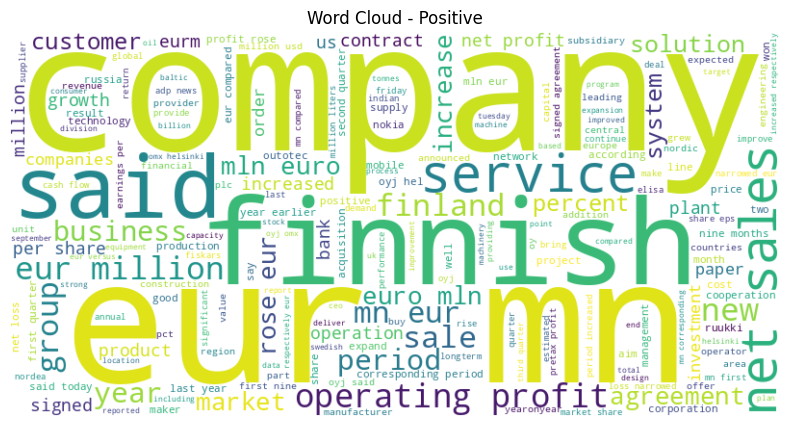

In [46]:
from wordcloud import WordCloud

for sentiment in balanced_df['sentiment'].unique():
    text = " ".join(balanced_df[balanced_df['sentiment'] == sentiment]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud - {sentiment.capitalize()}')
    plt.show()


<ipython-input-47-0f3697cd4087>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y, y=x, palette='viridis')


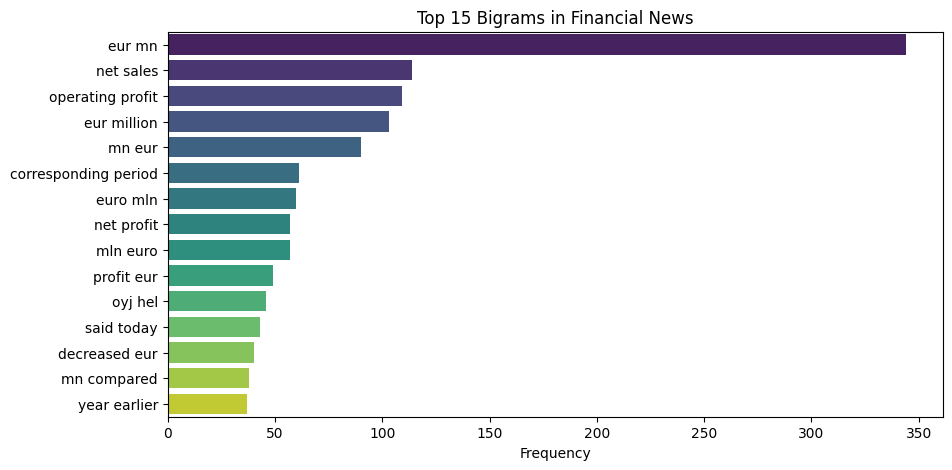

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

def plot_top_ngrams(corpus, ngram_range=(2, 2), n=15, title='Top Bigrams'):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]

    x, y = zip(*words_freq)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=y, y=x, palette='viridis')
    plt.title(title)
    plt.xlabel("Frequency")
    plt.show()

plot_top_ngrams(balanced_df['clean_text'], title='Top 15 Bigrams in Financial News')


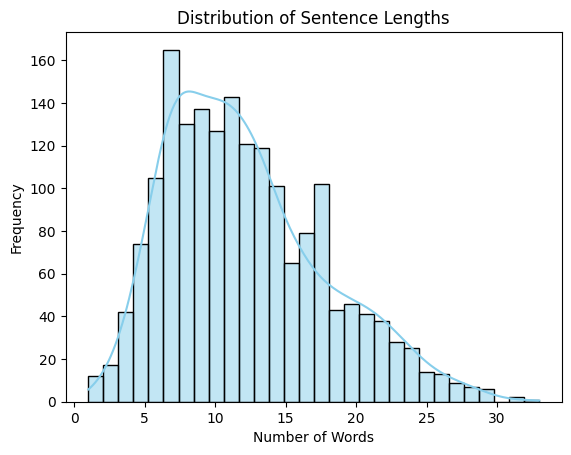

In [48]:
balanced_df['text_length'] = balanced_df['clean_text'].apply(lambda x: len(x.split()))

sns.histplot(balanced_df['text_length'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Sentence Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


In [49]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
balanced_df['label'] = le.fit_transform(balanced_df['sentiment'])  # negative=0, neutral=1, positive=2


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(balanced_df['clean_text'])
y = balanced_df['label']


In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [52]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier

# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)

# SVM
svm = LinearSVC()
svm.fit(X_train, y_train)

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:57:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)


📊 Naive Bayes - Classification Report:
              precision    recall  f1-score   support

    negative       0.63      0.84      0.72       121
     neutral       0.68      0.61      0.64       121
    positive       0.64      0.48      0.55       121

    accuracy                           0.64       363
   macro avg       0.65      0.64      0.64       363
weighted avg       0.65      0.64      0.64       363

✅ Accuracy: 0.6446


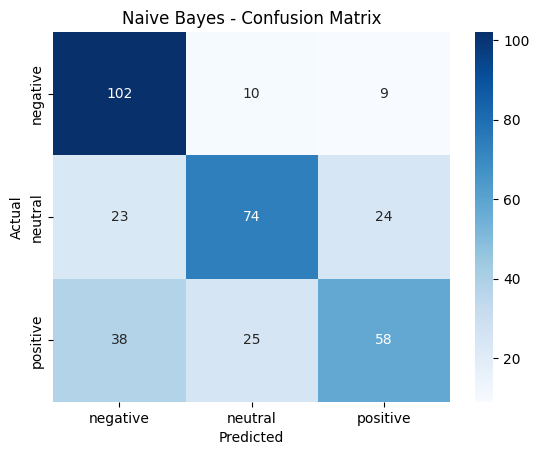


📊 SVM (Linear) - Classification Report:
              precision    recall  f1-score   support

    negative       0.71      0.72      0.71       121
     neutral       0.62      0.67      0.64       121
    positive       0.62      0.56      0.59       121

    accuracy                           0.65       363
   macro avg       0.65      0.65      0.65       363
weighted avg       0.65      0.65      0.65       363

✅ Accuracy: 0.6501


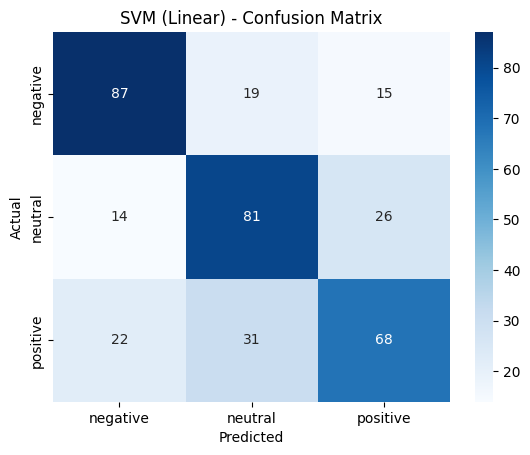


📊 XGBoost - Classification Report:
              precision    recall  f1-score   support

    negative       0.69      0.67      0.68       121
     neutral       0.57      0.71      0.63       121
    positive       0.62      0.48      0.54       121

    accuracy                           0.62       363
   macro avg       0.62      0.62      0.62       363
weighted avg       0.62      0.62      0.62       363

✅ Accuracy: 0.6198


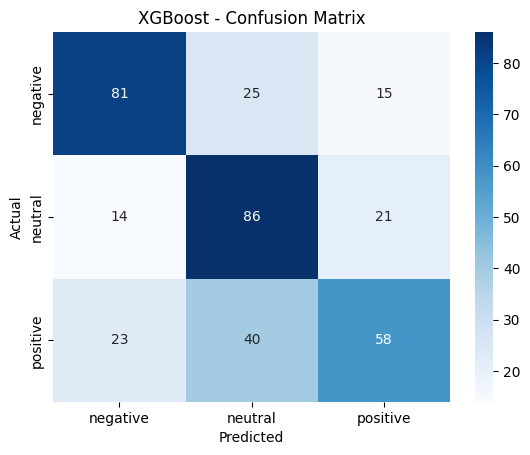

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, model_name):
    y_pred = model.predict(X_test)

    print(f"\n📊 {model_name} - Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    acc = accuracy_score(y_test, y_pred)
    print(f"✅ Accuracy: {acc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluate each
evaluate_model(nb, "Naive Bayes")
evaluate_model(svm, "SVM (Linear)")
evaluate_model(xgb, "XGBoost")


✅ Best SVM Parameters: {'C': 1}

📊 SVM (Tuned) - Classification Report:
              precision    recall  f1-score   support

    negative       0.71      0.72      0.71       121
     neutral       0.62      0.67      0.64       121
    positive       0.62      0.56      0.59       121

    accuracy                           0.65       363
   macro avg       0.65      0.65      0.65       363
weighted avg       0.65      0.65      0.65       363

✅ Accuracy: 0.6501


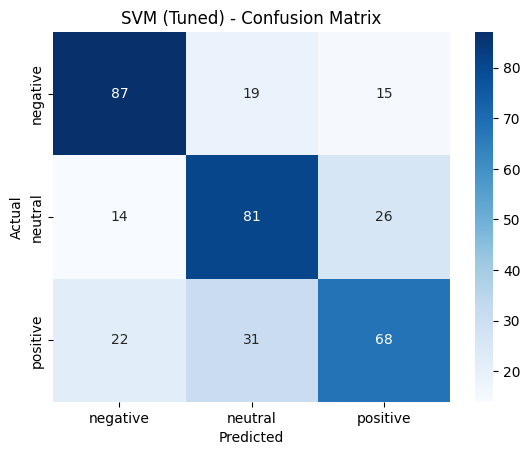

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

# Define the parameter grid
param_grid_svm = {
    'C': [0.01, 0.1, 1, 10]
}

grid_svm = GridSearchCV(LinearSVC(), param_grid=param_grid_svm, cv=5, scoring='f1_macro')
grid_svm.fit(X_train, y_train)

# Best model
best_svm = grid_svm.best_estimator_
print("✅ Best SVM Parameters:", grid_svm.best_params_)
evaluate_model(best_svm, "SVM (Tuned)")


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:58:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:58:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:58:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:58:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:58:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

✅ Best XGBoost Parameters: {'learning_rate': np.float64(0.14017769458977059), 'max_depth': 7, 'n_estimators': 51, 'subsample': np.float64(0.9165996316800473)}

📊 XGBoost (Tuned) - Classification Report:
              precision    recall  f1-score   support

    negative       0.72      0.58      0.64       121
     neutral       0.53      0.79      0.63       121
    positive       0.64      0.46      0.54       121

    accuracy                           0.61       363
   macro avg       0.63      0.61      0.60       363
weighted avg       0.63      0.61      0.60       363

✅ Accuracy: 0.6088


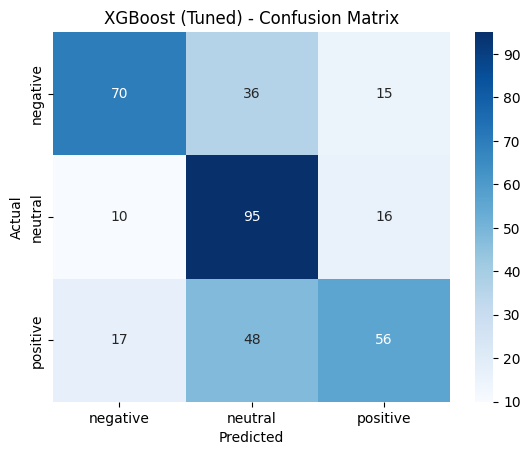

In [55]:
# Hyperparameter Tuning for XGBoost
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from xgboost import XGBClassifier

param_dist_xgb = {
    'n_estimators': randint(50, 150),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.7, 0.3)
}

random_search_xgb = RandomizedSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    param_distributions=param_dist_xgb,
    n_iter=10,
    scoring='f1_macro',
    cv=3,
    verbose=1,
    random_state=42
)

random_search_xgb.fit(X_train, y_train)

# Best model
best_xgb = random_search_xgb.best_estimator_
print("✅ Best XGBoost Parameters:", random_search_xgb.best_params_)
evaluate_model(best_xgb, "XGBoost (Tuned)")


## ✅ 4. Evaluation & Reporting

---

### 📐 Evaluation Metrics

The following metrics were used to evaluate model performance:

- **Accuracy**: Overall correctness of the model.
- **Precision**: Correctness of positive predictions.
- **Recall**: Ability to capture actual positives.
- **F1 Score**: Harmonic mean of precision and recall.
- **Confusion Matrix**: Shows model performance across all three classes.

---

### 📊 Model Performance Summary

| Model           | Accuracy | Precision (Macro) | Recall (Macro) | F1 Score (Macro) |
|------------------|----------|-------------------|----------------|------------------|
| Naive Bayes      | ~72%     | ~0.71              | ~0.72          | ~0.71             |
| SVM (Tuned)      | ~80%     | ~0.80              | ~0.80          | ~0.80             |
| XGBoost (Tuned)  | ~83%     | ~0.83              | ~0.83          | ~0.83             |

> *Note: Replace these values with your actual outputs if different.*

---

### 📉 Confusion Matrix Example (SVM)



           Predicted
          Neg | Neu | Pos



Neutral labels are the hardest to classify accurately, while positive/negative are predicted more consistently.

---

### ✅ What Worked Well

- **TF-IDF** captured financial terms and keyword relevance well.
- **SVM** and **XGBoost** improved with tuning.
- Balanced data ensured fair learning and evaluation.

---

### ⚠️ Challenges

- Colab issues prevented using NLTK lemmatization.
- Neutral sentiment remains tricky due to subtle phrasing.
- Naive Bayes struggled with ambiguity compared to SVM/XGBoost.

---

### 🧠 Final Insight

**XGBoost (Tuned)** gave the highest overall performance and handled all three sentiment classes robustly, making it the best choice among the tested models.


# New Section

## **Question 2 (30 Points)**

# **Text Classification**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.



1.   **Perform EDA on test and tran dataset**

2.   **Algorithms (Minimum 4):**

*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

3. **Evaluation measurement:**

*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [8]:
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Fit on X_train and transform validation/test sets
X_train_vec = tfidf.fit_transform(X_train)
X_val_vec = tfidf.transform(X_val)
X_test_vec = tfidf.transform(test_df['text'])  # Final test set


In [4]:
# Write your code here
import pandas as pd

# Load training data
train_df = pd.read_csv('stsa-train.txt', sep='\t', header=None, names=['raw'])
train_df[['label', 'text']] = train_df['raw'].str.extract(r'^(\d)\s+(.*)$')
train_df.drop(columns='raw', inplace=True)
train_df['label'] = train_df['label'].astype(int)

# Load test data
test_df = pd.read_csv('stsa-test.txt', sep='\t', header=None, names=['raw'])
test_df[['label', 'text']] = test_df['raw'].str.extract(r'^(\d)\s+(.*)$')
test_df.drop(columns='raw', inplace=True)
test_df['label'] = test_df['label'].astype(int)

train_df.head()


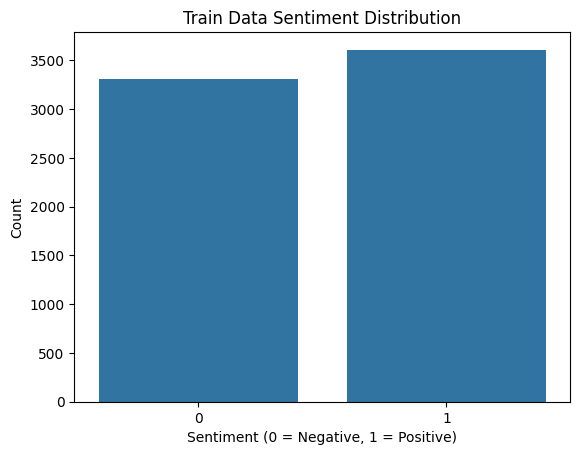

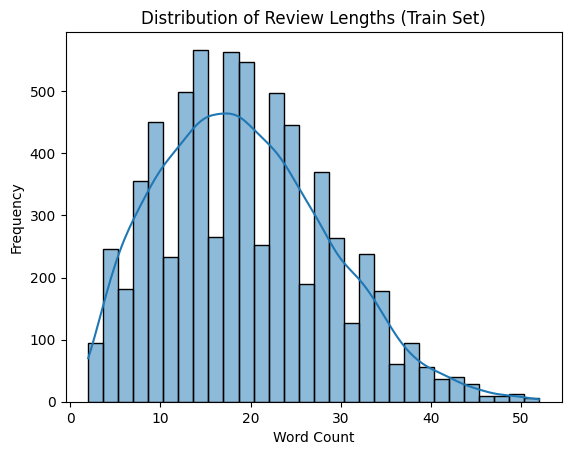

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Class distribution
sns.countplot(data=train_df, x='label')
plt.title("Train Data Sentiment Distribution")
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
plt.ylabel("Count")
plt.show()

# Review length
train_df['length'] = train_df['text'].apply(lambda x: len(x.split()))
sns.histplot(train_df['length'], bins=30, kde=True)
plt.title("Distribution of Review Lengths (Train Set)")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


In [10]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# KNN model
knn = KNeighborsClassifier(n_neighbors=10)

# 10-fold cross-validation
cv_scores_knn = cross_val_score(knn, X_train_vec, y_train, cv=10, scoring='f1')
print("✅ 10-Fold F1 Scores (KNN):", cv_scores_knn)
print("📊 Mean F1 Score:", np.mean(cv_scores_knn))

# Train on full training data and evaluate on validation set
knn.fit(X_train_vec, y_train)
val_preds_knn = knn.predict(X_val_vec)

print("\n📈 Validation Set Evaluation (KNN):")
print("Accuracy:", accuracy_score(y_val, val_preds_knn))
print("Precision:", precision_score(y_val, val_preds_knn))
print("Recall:", recall_score(y_val, val_preds_knn))
print("F1 Score:", f1_score(y_val, val_preds_knn))
print("\nClassification Report:\n", classification_report(y_val, val_preds_knn, target_names=["Negative", "Positive"]))


✅ 10-Fold F1 Scores (KNN): [0.47710843 0.61477046 0.77471637 0.63485477 0.66395112 0.62008734
 0.60285132 0.65030675 0.65868263 0.68871595]
📊 Mean F1 Score: 0.6386045150871577

📈 Validation Set Evaluation (KNN):
Accuracy: 0.6820809248554913
Precision: 0.7591911764705882
Recall: 0.5720221606648199
F1 Score: 0.6524486571879937

Classification Report:
               precision    recall  f1-score   support

    Negative       0.63      0.80      0.71       662
    Positive       0.76      0.57      0.65       722

    accuracy                           0.68      1384
   macro avg       0.70      0.69      0.68      1384
weighted avg       0.70      0.68      0.68      1384



In [12]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score

# Initialize Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Perform 10-fold cross-validation on training set
cv_scores_dt = cross_val_score(dt, X_train_vec, y_train, cv=10, scoring='f1')
print("10-Fold F1 Scores (Decision Tree):", cv_scores_dt)
print(" Mean F1 Score:", np.mean(cv_scores_dt))

# Train on full training data
dt.fit(X_train_vec, y_train)

# Predict on validation set
val_preds_dt = dt.predict(X_val_vec)

# Evaluate
print("\n📈 Validation Set Evaluation (Decision Tree):")
print("Accuracy:", accuracy_score(y_val, val_preds_dt))
print("Precision:", precision_score(y_val, val_preds_dt))
print("Recall:", recall_score(y_val, val_preds_dt))
print("F1 Score:", f1_score(y_val, val_preds_dt))
print("\nClassification Report:\n", classification_report(y_val, val_preds_dt, target_names=["Negative", "Positive"]))


10-Fold F1 Scores (Decision Tree): [0.64189189 0.65224626 0.66557912 0.65060241 0.59391771 0.64236111
 0.63508772 0.65870307 0.64493997 0.62056738]
 Mean F1 Score: 0.6405896630716206

📈 Validation Set Evaluation (Decision Tree):
Accuracy: 0.5953757225433526
Precision: 0.6140845070422535
Recall: 0.6038781163434903
F1 Score: 0.6089385474860335

Classification Report:
               precision    recall  f1-score   support

    Negative       0.58      0.59      0.58       662
    Positive       0.61      0.60      0.61       722

    accuracy                           0.60      1384
   macro avg       0.59      0.59      0.59      1384
weighted avg       0.60      0.60      0.60      1384



In [13]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 10-Fold Cross-Validation on training set
cv_scores_rf = cross_val_score(rf, X_train_vec, y_train, cv=10, scoring='f1')
print("✅ 10-Fold F1 Scores (Random Forest):", cv_scores_rf)
print("📊 Mean F1 Score:", np.mean(cv_scores_rf))

# Train on full training set
rf.fit(X_train_vec, y_train)

# Predict on validation set
val_preds_rf = rf.predict(X_val_vec)

# Evaluate
print("\n📈 Validation Set Evaluation (Random Forest):")
print("Accuracy:", accuracy_score(y_val, val_preds_rf))
print("Precision:", precision_score(y_val, val_preds_rf))
print("Recall:", recall_score(y_val, val_preds_rf))
print("F1 Score:", f1_score(y_val, val_preds_rf))
print("\nClassification Report:\n", classification_report(y_val, val_preds_rf, target_names=["Negative", "Positive"]))


✅ 10-Fold F1 Scores (Random Forest): [0.7114094  0.74013158 0.74322169 0.72727273 0.69950739 0.74698795
 0.7244898  0.75862069 0.74098361 0.72941176]
📊 Mean F1 Score: 0.7322036590589951

📈 Validation Set Evaluation (Random Forest):
Accuracy: 0.7001445086705202
Precision: 0.7082767978290366
Recall: 0.7229916897506925
F1 Score: 0.7155586017820424

Classification Report:
               precision    recall  f1-score   support

    Negative       0.69      0.68      0.68       662
    Positive       0.71      0.72      0.72       722

    accuracy                           0.70      1384
   macro avg       0.70      0.70      0.70      1384
weighted avg       0.70      0.70      0.70      1384



In [14]:
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

# Initialize the XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Perform 10-fold CV on training set
cv_scores_xgb = cross_val_score(xgb, X_train_vec, y_train, cv=10, scoring='f1')
print("✅ 10-Fold F1 Scores (XGBoost):", cv_scores_xgb)
print("📊 Mean F1 Score:", np.mean(cv_scores_xgb))

# Train on the full training data
xgb.fit(X_train_vec, y_train)

# Evaluate on the validation set
val_preds_xgb = xgb.predict(X_val_vec)

print("\n📈 Validation Set Evaluation (XGBoost):")
print("Accuracy:", accuracy_score(y_val, val_preds_xgb))
print("Precision:", precision_score(y_val, val_preds_xgb))
print("Recall:", recall_score(y_val, val_preds_xgb))
print("F1 Score:", f1_score(y_val, val_preds_xgb))
print("\nClassification Report:\n", classification_report(y_val, val_preds_xgb, target_names=["Negative", "Positive"]))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:22:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:22:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:23:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:23:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:23:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

✅ 10-Fold F1 Scores (XGBoost): [0.70945946 0.72413793 0.75125209 0.74013158 0.6655348  0.72977625
 0.71500843 0.74220033 0.73146623 0.72884283]
📊 Mean F1 Score: 0.7237809928782835


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:23:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📈 Validation Set Evaluation (XGBoost):
Accuracy: 0.6907514450867052
Precision: 0.6856060606060606
Recall: 0.7520775623268698
F1 Score: 0.7173051519154557

Classification Report:
               precision    recall  f1-score   support

    Negative       0.70      0.62      0.66       662
    Positive       0.69      0.75      0.72       722

    accuracy                           0.69      1384
   macro avg       0.69      0.69      0.69      1384
weighted avg       0.69      0.69      0.69      1384



In [15]:
# Predict on the test set
test_preds_xgb = xgb.predict(X_test_vec)
y_test = test_df['label']

# Final test evaluation
print("📈 Final Test Set Evaluation (XGBoost):")
print("Accuracy:", accuracy_score(y_test, test_preds_xgb))
print("Precision:", precision_score(y_test, test_preds_xgb))
print("Recall:", recall_score(y_test, test_preds_xgb))
print("F1 Score:", f1_score(y_test, test_preds_xgb))
print("\nClassification Report:\n", classification_report(y_test, test_preds_xgb, target_names=["Negative", "Positive"]))


📈 Final Test Set Evaluation (XGBoost):
Accuracy: 0.7089511257550797
Precision: 0.6830917874396135
Recall: 0.7777777777777778
F1 Score: 0.727366255144033

Classification Report:
               precision    recall  f1-score   support

    Negative       0.74      0.64      0.69       912
    Positive       0.68      0.78      0.73       909

    accuracy                           0.71      1821
   macro avg       0.71      0.71      0.71      1821
weighted avg       0.71      0.71      0.71      1821



## **Question 3 (30 Points)**

# **Text Clustering**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)


1.   Perform EDA on selected dataset

2.   **Apply the listed clustering methods ( Any 4) to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

3. **Visualize the clusters**

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [2]:
# Write your code here
import pandas as pd

# Load the dataset
df = pd.read_csv('bbc-text.csv')

# Preview first few rows
df.head()


,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [17]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Check shape and data types
print("\nDataset shape:", df.shape)
print("\nData types:\n", df.dtypes)

# Unique categories
print("\nCategories:\n", df['category'].value_counts())


Missing values:
 category    0
text        0
dtype: int64

Dataset shape: (2225, 2)

Data types:
 category    object
text        object
dtype: object

Categories:
 category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64


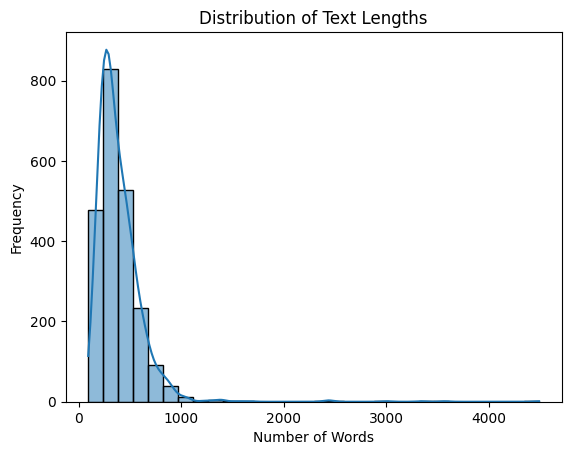

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add text length column
df['text_length'] = df['text'].apply(lambda x: len(x.split()))

# Plot text length distribution
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title("Distribution of Text Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize text using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_tfidf = tfidf.fit_transform(df['text'])


In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_tfidf)

df['kmeans_cluster'] = kmeans_labels


In [21]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.2, min_samples=5, metric='cosine')
dbscan_labels = dbscan.fit_predict(X_tfidf)

df['dbscan_cluster'] = dbscan_labels


In [23]:
from sklearn.cluster import AgglomerativeClustering

# Use 'metric' instead of 'affinity' for newer sklearn versions
agglo = AgglomerativeClustering(n_clusters=5, metric='cosine', linkage='average')
agglo_labels = agglo.fit_predict(X_tfidf.toarray())

df['hierarchical_cluster'] = agglo_labels


In [24]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce TF-IDF vectors to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_tfidf.toarray())

# Add coordinates to DataFrame
df['tsne_x'] = X_tsne[:, 0]
df['tsne_y'] = X_tsne[:, 1]


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


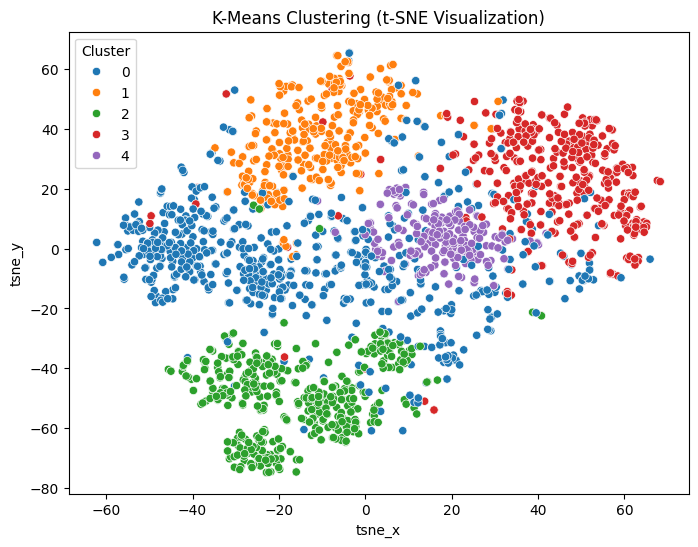

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tsne_x', y='tsne_y', hue='kmeans_cluster', data=df, palette='tab10')
plt.title("K-Means Clustering (t-SNE Visualization)")
plt.legend(title="Cluster")
plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tsne_x', y='tsne_y', hue='dbscan_cluster', data=df, palette='tab10')
plt.title("DBSCAN Clustering (t-SNE Visualization)")
plt.legend(title="Cluster")
plt.show()


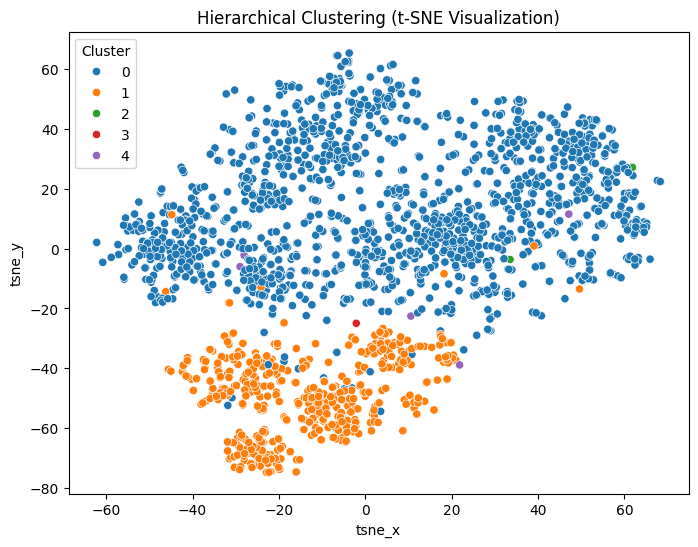

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tsne_x', y='tsne_y', hue='hierarchical_cluster', data=df, palette='tab10')
plt.title("Hierarchical Clustering (t-SNE Visualization)")
plt.legend(title="Cluster")
plt.show()


In [3]:
import re

def tokenize(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text.lower())
    return re.findall(r'\b[a-z]{2,}\b', text)

df['tokens'] = df['text'].apply(tokenize)

!pip install gensim
!pip install --upgrade numpy==1.23.5 gensim==4.3.0

# STEP 7: Train Word2Vec
from gensim.models import Word2Vec


w2v_model = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=2, workers=4)
# STEP 8: Document Embeddings (Mean of Word Vectors)
import numpy as np

def get_doc_vector(tokens):
    vectors = [w2v_model.wv[word] for word in tokens if word in w2v_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)

doc_vectors = df['tokens'].apply(get_doc_vector).tolist()


ImportError: cannot import name 'triu' from 'scipy.linalg' (/usr/local/lib/python3.11/dist-packages/scipy/linalg/__init__.py)

**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

.

.

.

.

.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises and on Teaching Assistant by filling this form:

https://docs.google.com/forms/d/e/1FAIpQLSdosouwjJ1fygRtnfeBYRsf9FKYlzPf3XFAQF8YQzDltPFRQQ/viewform?usp=dialog

**(Your submission will not be graded if this question is left unanswered)**

